In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.datasets import load_iris
from joblib import dump, load


fifaGK=pd.read_csv('../data/cleaned/GK_summary.csv')
fifaOUT=pd.read_csv('../data/cleaned/OUT_summary.csv')

In [2]:
X=fifaGK[['overall','age','potential','wage_eur']]
y=fifaGK[['value_eur']]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, KFold


X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=0)


lr = LinearRegression()


param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}


cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X, y)


print("Cei mai buni parametri:")
print(grid_search.best_params_)

print("\nCel mai bun RMSE (cu semn schimbat):")
print(-grid_search.best_score_)


# Este la fel acuratetea nu schimba nimic

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Cei mai buni parametri:
{'fit_intercept': True, 'positive': False}

Cel mai bun RMSE (cu semn schimbat):
0.10383896444594946


In [4]:
lm = grid_search.best_estimator_

In [5]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
lm_predictions=lm.predict(X_test)

In [7]:


lm_predictions = np.ravel(lm_predictions)  
y_test = np.ravel(y_test)

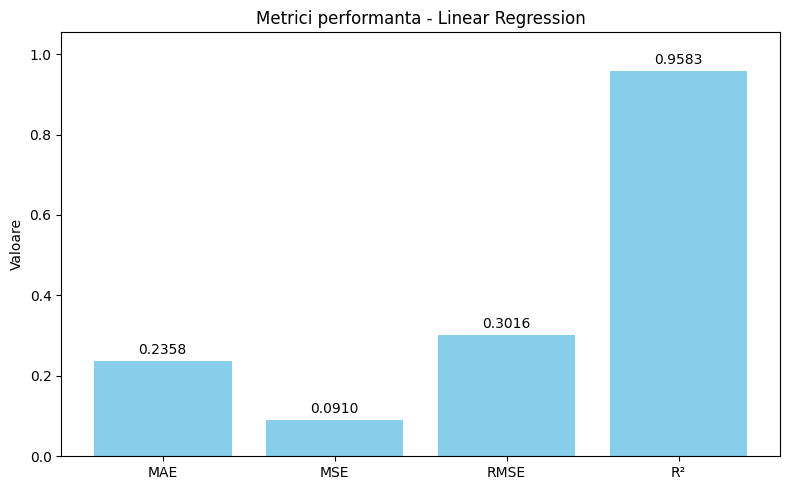

<Figure size 640x480 with 0 Axes>

In [8]:
mae = mean_absolute_error(y_test, lm_predictions)
mse = mean_squared_error(y_test, lm_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lm_predictions)


metric_names = ["MAE", "MSE", "RMSE", "R²"]
metric_values = [mae, mse, rmse, r2]


plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color="skyblue")


for bar, value in zip(bars, metric_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f"{value:.4f}", 
             ha='center', va='bottom')

plt.ylabel("Valoare")
plt.title("Metrici performanta - Linear Regression")
plt.ylim(0, max(metric_values) * 1.1)
plt.tight_layout()
plt.savefig("../outputs/plots/model_comparison//Barplot_acuratete_lr_gk.png")
plt.show()
plt.clf()

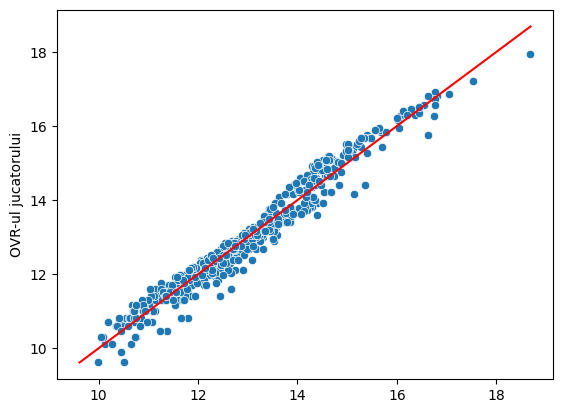

<Figure size 640x480 with 0 Axes>

In [9]:
sns.scatterplot(x=lm_predictions, y=y_test)
plt.ylabel('OVR-ul jucatorului')
# plt.xlabel('Valoarea Jucatiului')

min_val = min(min(lm_predictions), min(y_test))
max_val = max(max(lm_predictions), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='y = x')
plt.savefig("../outputs/plots/model_comparison/Scatterplot_pentru_LR_gk.png")
plt.show()
plt.clf()

In [10]:
r2_lr = r2_score(y_test, lm_predictions)
print(r2_lr)

0.9583258647271672


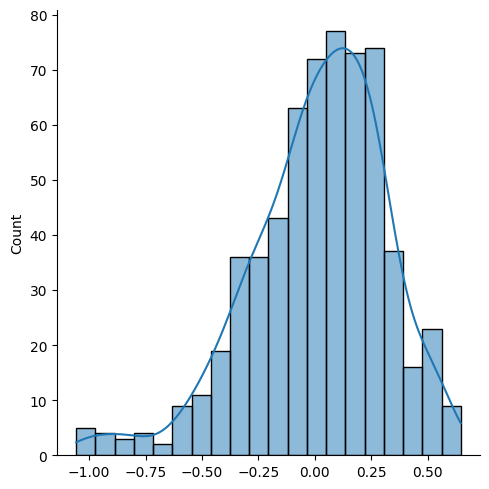

In [11]:
residuals=y_test-lm_predictions

sns.displot(residuals, bins=20, kde=True)
plt.savefig("../outputs/plots/model_comparison/residuals_LR_gk.png")
plt.show()

In [12]:
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, KFold


X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)



rf = GradientBoostingRegressor(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error', 
    cv=cv,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X, y)


print("Cei mai buni parametri:")
print(grid_search.best_params_)

print("\nCel mai bun scor RMSE (cu semn schimbat):")
print(-grid_search.best_score_)  

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Cei mai buni parametri:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}

Cel mai bun scor RMSE (cu semn schimbat):
50.00584977614902


In [13]:
gbr = grid_search.best_estimator_
gbr.fit(X_train, y_train)

c:\Users\lukas\Desktop\Data-Science-Internship\venv\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,150
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_depth,10
,min_impurity_decrease,0.0
,init,None


In [14]:
gbr_predictions=gbr.predict(X_test)

In [15]:
gbr_predictions = np.ravel(gbr_predictions)  
y_test = np.ravel(y_test)

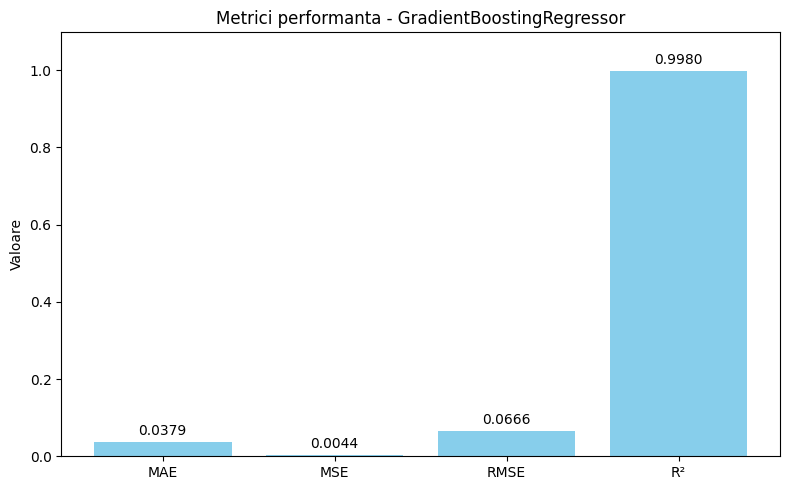

<Figure size 640x480 with 0 Axes>

In [16]:
mae = mean_absolute_error(y_test, gbr_predictions)
mse = mean_squared_error(y_test, gbr_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, gbr_predictions)


metric_names = ["MAE", "MSE", "RMSE", "R²"]
metric_values = [mae, mse, rmse, r2]


plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color="skyblue")


for bar, value in zip(bars, metric_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f"{value:.4f}", 
             ha='center', va='bottom')

plt.ylabel("Valoare")
plt.title("Metrici performanta - GradientBoostingRegressor")
plt.ylim(0, max(metric_values) * 1.1)
plt.tight_layout()
plt.savefig("../outputs/plots/model_comparison//Barplot_acuratete_GBR_gk.png")
plt.show()
plt.clf()

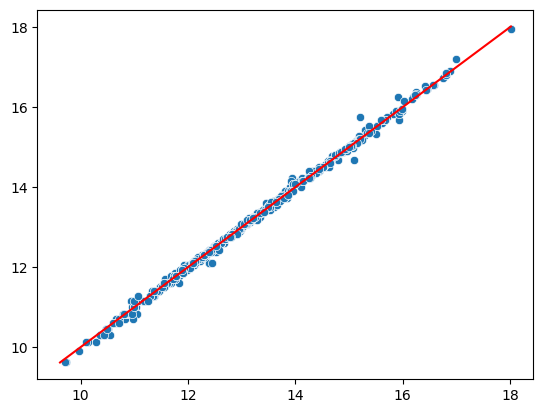

<Figure size 640x480 with 0 Axes>

In [17]:
sns.scatterplot(x=gbr_predictions, y=y_test)

min_val = min(min(gbr_predictions), min(y_test))
max_val = max(max(gbr_predictions), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='y = x')
plt.savefig("../outputs/plots/Scatterplot_pentru_GBR_gk.png")
plt.show()
plt.clf()

In [18]:
r2_gb = r2_score(y_test, gbr_predictions)
print(r2_gb)

0.9979655830945414


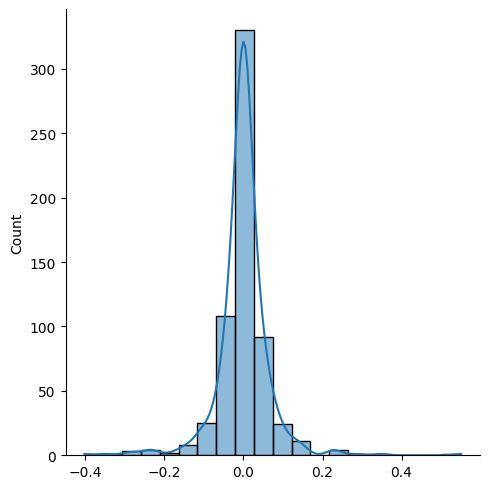

In [19]:
residuals=y_test-gbr_predictions

sns.displot(residuals, bins=20, kde=True)
plt.savefig("../outputs/plots/model_comparison/residuals_GBR_gk.png")
plt.show()

In [20]:
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, KFold


X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)



rf = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error', 
    cv=cv,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X, y)


print("Cei mai buni parametri:")
print(grid_search.best_params_)

print("\nCel mai bun scor RMSE (cu semn schimbat):")
print(-grid_search.best_score_)  

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Cei mai buni parametri:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Cel mai bun scor RMSE (cu semn schimbat):
54.382765658774154


In [21]:
rfr=grid_search.best_estimator_
rfr.fit(X_train,y_train)

c:\Users\lukas\Desktop\Data-Science-Internship\venv\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
rfr_predictions=rfr.predict(X_test)

In [23]:
rfr_predictions = np.ravel(rfr_predictions)  
y_test = np.ravel(y_test)

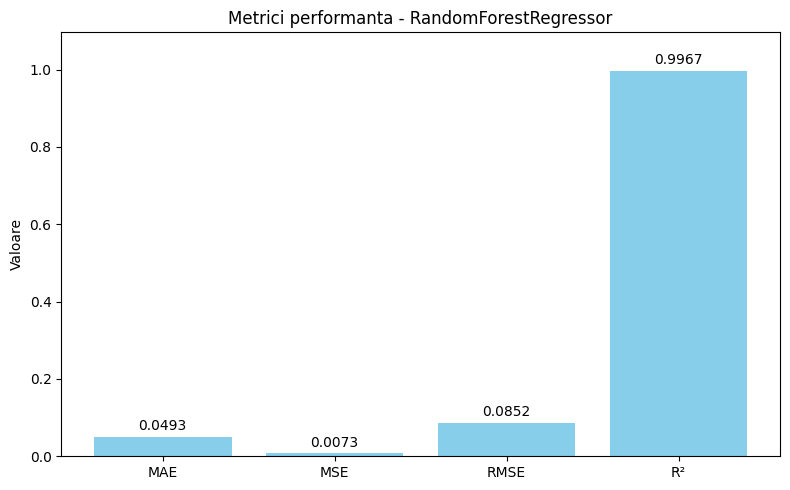

<Figure size 640x480 with 0 Axes>

In [24]:
mae = mean_absolute_error(y_test, rfr_predictions)
mse = mean_squared_error(y_test, rfr_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rfr_predictions)


metric_names = ["MAE", "MSE", "RMSE", "R²"]
metric_values = [mae, mse, rmse, r2]


plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color="skyblue")


for bar, value in zip(bars, metric_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f"{value:.4f}", 
             ha='center', va='bottom')

plt.ylabel("Valoare")
plt.title("Metrici performanta - RandomForestRegressor")
plt.ylim(0, max(metric_values) * 1.1)
plt.tight_layout()
plt.savefig("../outputs/plots/model_comparison/Barplot_acuratete_RFR_gk.png")
plt.show()
plt.clf()

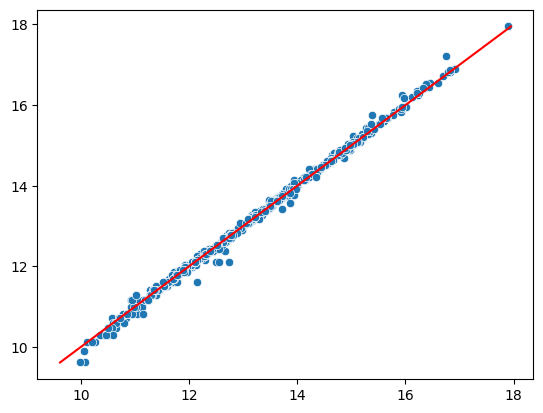

<Figure size 640x480 with 0 Axes>

In [25]:
sns.scatterplot(x=rfr_predictions, y=y_test)


min_val = min(min(rfr_predictions), min(y_test))
max_val = max(max(rfr_predictions), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='y = x')
plt.savefig("../outputs/plots/Scatterplot_pentru_RFR_gk.png")
plt.show()
plt.clf()


In [26]:
r2_rf = r2_score(y_test, rfr_predictions)
print(r2_rf)

0.9966723030953244


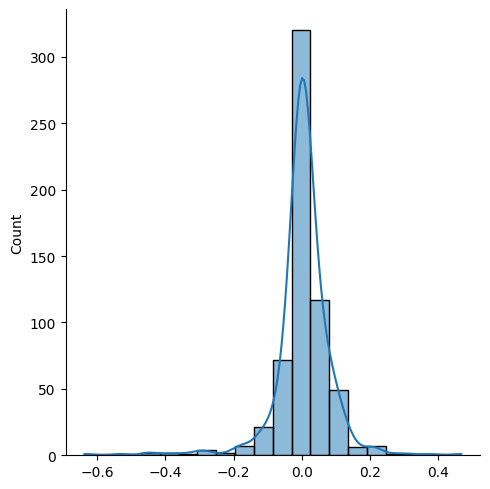

In [27]:
residuals=y_test-rfr_predictions

sns.displot(residuals, bins=20, kde=True)
plt.savefig("../outputs/plots/model_comparison/residuals_RFR_gk.png")
plt.show()

In [28]:
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, KFold


X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=0)


lr = DecisionTreeRegressor()


param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X, y)


print("Cei mai buni parametri:")
print(grid_search.best_params_)

print("\nCel mai bun RMSE (cu semn schimbat):")
print(-grid_search.best_score_)


# Este la fel acuratetea nu schimba nimic

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Cei mai buni parametri:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Cel mai bun RMSE (cu semn schimbat):
83.36090701778983


In [29]:
dtr=grid_search.best_estimator_
dtr.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [30]:
dtr_predictions=dtr.predict(X_test)

In [31]:
predictions = np.ravel(dtr_predictions)  
y_test = np.ravel(y_test)

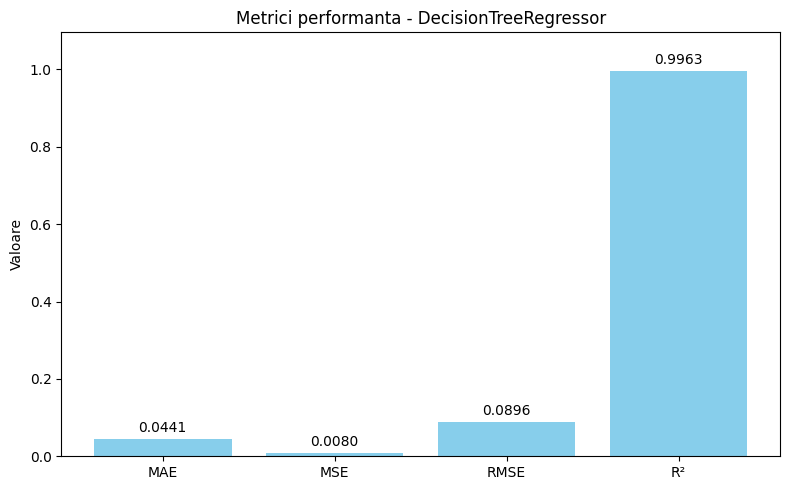

<Figure size 640x480 with 0 Axes>

In [32]:
mae = mean_absolute_error(y_test, dtr_predictions)
mse = mean_squared_error(y_test, dtr_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dtr_predictions)


metric_names = ["MAE", "MSE", "RMSE", "R²"]
metric_values = [mae, mse, rmse, r2]


plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color="skyblue")


for bar, value in zip(bars, metric_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f"{value:.4f}", 
             ha='center', va='bottom')

plt.ylabel("Valoare")
plt.title("Metrici performanta - DecisionTreeRegressor")
plt.ylim(0, max(metric_values) * 1.1)
plt.tight_layout()
plt.savefig("../outputs/plots/model_comparison/Barplot_acuratete_DTR.png")
plt.show()
plt.clf()

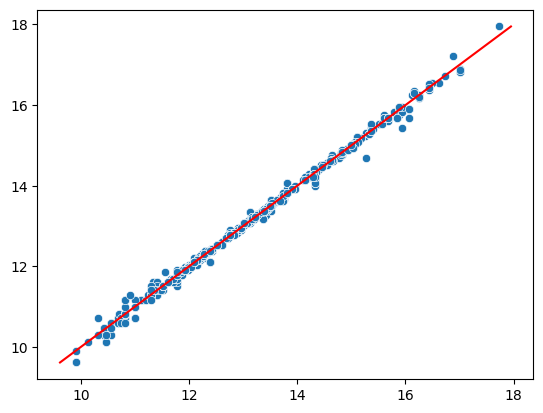

In [33]:
sns.scatterplot(x=dtr_predictions,y=y_test)
plt.xlabel='Valoarea jucatorului'

min_val = min(min(dtr_predictions), min(y_test))
max_val = max(max(dtr_predictions), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='y = x')
plt.savefig("../outputs/plots/model_comparison/Barplot_acuratete_DTR_gk.png")
plt.show()

In [34]:
r2_dt = r2_score(y_test,dtr_predictions)
print(r2_dt)

0.9963205339371982


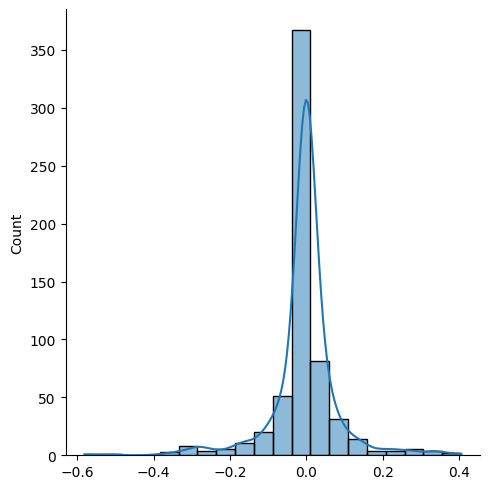

In [35]:
residuals=y_test-dtr_predictions

sns.displot(residuals, bins=20, kde=True)

plt.savefig("../outputs/plots/model_comparison/residuals_DTR_gk.png")
plt.show()

In [36]:
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, KFold


X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=0)

lr = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

print("Cei mai buni parametri:")
print(grid_search.best_params_)

print("\nCel mai bun RMSE (cu semn schimbat):")
print(-grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Cei mai buni parametri:
{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

Cel mai bun RMSE (cu semn schimbat):
53.91255609050803


In [37]:
nbr=grid_search.best_estimator_
nbr.fit(X_train,y_train)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [38]:
nbr_predictions=nbr.predict(X_test)

In [39]:
nbr_predictions=np.ravel(nbr_predictions)
y_test=np.ravel(y_test)

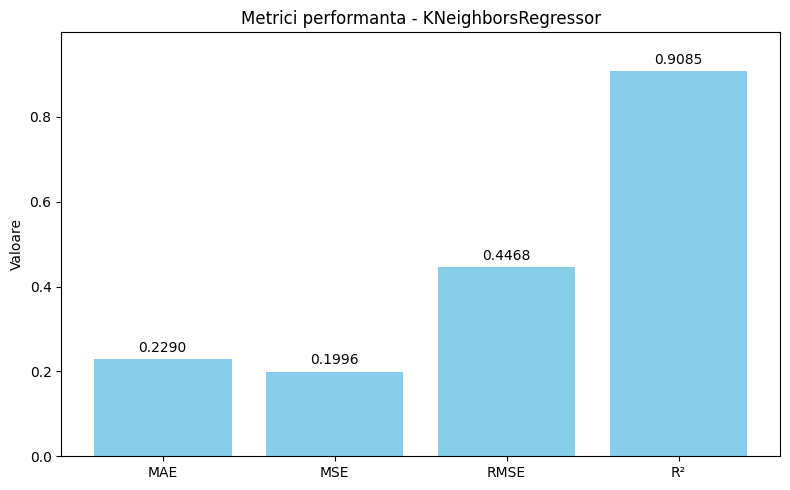

<Figure size 640x480 with 0 Axes>

In [40]:
mae = mean_absolute_error(y_test, nbr_predictions)
mse = mean_squared_error(y_test, nbr_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, nbr_predictions)


metric_names = ["MAE", "MSE", "RMSE", "R²"]
metric_values = [mae, mse, rmse, r2]


plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color="skyblue")


for bar, value in zip(bars, metric_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f"{value:.4f}", 
             ha='center', va='bottom')

plt.ylabel("Valoare")
plt.title("Metrici performanta - KNeighborsRegressor")
plt.ylim(0, max(metric_values) * 1.1)
plt.tight_layout()
plt.savefig("../outputs/plots/model_comparison/Barplot_acuratete_KNR_gk.png")
plt.show()
plt.clf()

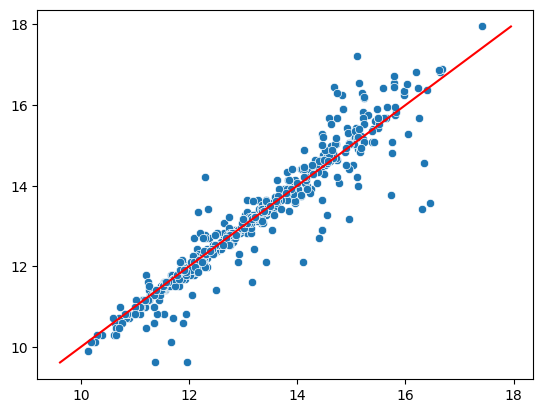

In [41]:
sns.scatterplot(x=nbr_predictions,y=y_test)
plt.xlabel='Valoarea jucatorului'

min_val = min(min(nbr_predictions), min(y_test))
max_val = max(max(nbr_predictions), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='y = x')
plt.savefig("../outputs/plots/model_comparison/Scatterplot_acuratete_KNR_gk.png")
plt.show()

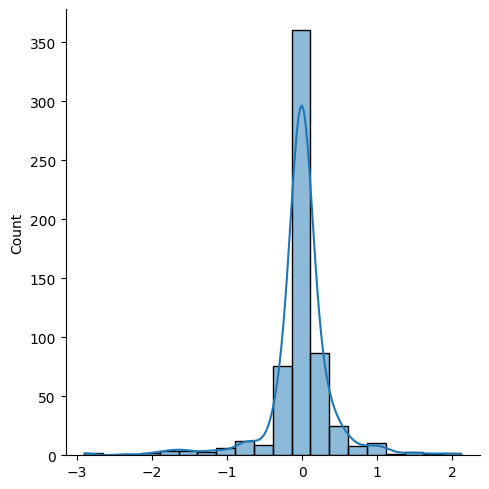

In [42]:
residuals=y_test-nbr_predictions

sns.displot(residuals, bins=20, kde=True)

plt.savefig("../outputs/plots/model_comparison/residuals_KNR_gk.png")
plt.show()

In [43]:
r2_nbr = r2_score(y_test, nbr_predictions)
print(r2_gb)

0.9979655830945414


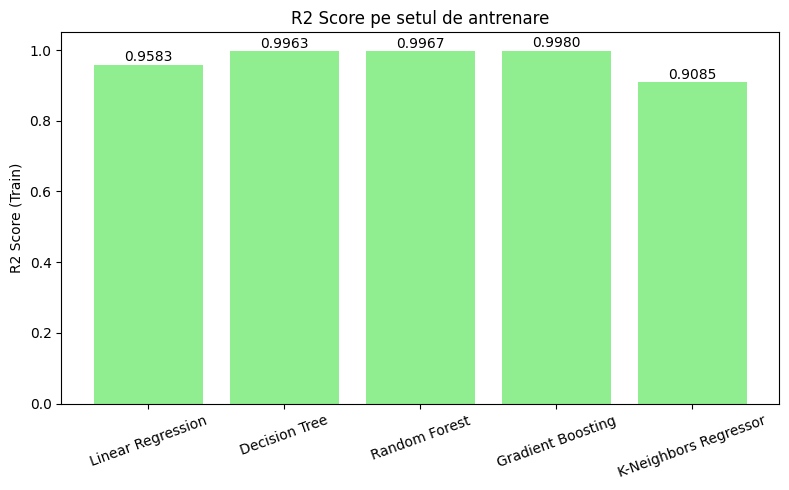

In [44]:
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting","K-Neighbors Regressor"]
r2_values = [r2_lr, r2_dt, r2_rf, r2_gb,r2_nbr]

plt.figure(figsize=(8, 5))
plt.bar(model_names, r2_values, color='lightgreen')
plt.ylabel("R2 Score (Train)")
plt.title("R2 Score pe setul de antrenare")
plt.ylim(0, 1.05)

for i, score in enumerate(r2_values):
    plt.text(i, score + 0.01, f"{score:.4f}", ha='center')

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In final am ales ca model final cel de Gradient Regressor pentru ca este cel cu cea mai buna acuratete(99.80%)